In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your datasets (replace with actual file paths)
df1 = pd.read_csv('data.csv')
df2 = pd.read_csv('missing_value.csv')

# Transpose the dataframes to switch rows and columns
df1_t = df1.T
df2_t = df2.T

# Check for missing values
missing_columns = df2_t.columns[df2_t.isnull().any()]
if missing_columns.empty:
    print("No missing values found.")
else:
    print("Columns with missing values:", missing_columns)

    # Initialize the LinearRegression model
    regressor = LinearRegression()

    # Iterate over each column with missing values
    for col in missing_columns:
        missing_indices = df2_t[col].isnull()
        # Check if there are any samples with complete data
        if not missing_indices.all():
            # Fit the model on rows with complete data
            regressor.fit(df1_t[~missing_indices], df2_t[col][~missing_indices])
            # Predict missing values
            df2_t[col][missing_indices] = regressor.predict(df1_t[missing_indices])
        else:
            print("No complete data found for column:", col)

# Transpose back to the original orientation
df2_imputed = df2_t.T

# Ensure the columns and index are in the correct order after transposition
df2_imputed.columns = df2.columns
df2_imputed.index = df2.index

# Round the imputed values to omit decimals
df2_imputed = df2_imputed.round(0)

# Measure the performance for continuous data
mse = mean_squared_error(df1, df2_imputed)
mae = mean_absolute_error(df1, df2_imputed)
r2 = r2_score(df1.values.flatten(), df2_imputed.values.flatten())

print("\nMean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (coefficient of determination):", r2)

# Print the original, missing, and imputed dataframes
print("\nOriginal DataFrame (df1):")
print(df1)

print("\nDataFrame with Missing Values (df2):")
print(df2)

print("\nImputed DataFrame (df2_imputed):")
print(df2_imputed)


Columns with missing values: Index([3, 4, 7, 9, 12], dtype='int64')

Mean Squared Error: 4277532.261904762
Mean Absolute Error: 415.8333333333333
R-squared (coefficient of determination): 0.99864897004289

Original DataFrame (df1):
      2017    2018    2019
0   192274  201191  265954
1    25181   28523   26735
2     2024    2113    1904
3     4716    5544    8956
4     4105    4307    4481
5    16569   15405    4181
6     1939    2166    1622
7     2670    4952    5212
8    17937   18991   19968
9     4141    3139    2195
10      22      14      31
11      99     101     369
12      19       5      12
13      11       7       9

DataFrame with Missing Values (df2):
      2017      2018      2019
0   192274  201191.0  265954.0
1    25181   28523.0   26735.0
2     2024    2113.0    1904.0
3     4716       NaN    8956.0
4     4105    4307.0       NaN
5    16569   15405.0    4181.0
6     1939    2166.0    1622.0
7     2670    4952.0       NaN
8    17937   18991.0   19968.0
9     4141     

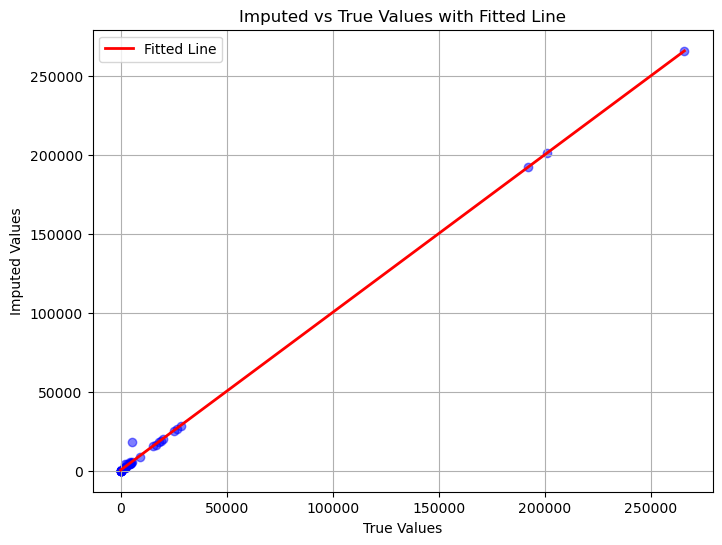

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Flatten the true and imputed values
true_values_flat = df1.values.flatten()
imputed_values_flat = df2_imputed.values.flatten()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(true_values_flat, imputed_values_flat, color='blue', alpha=0.5)
plt.title('Imputed vs True Values with Fitted Line')
plt.xlabel('True Values')
plt.ylabel('Imputed Values')
plt.grid(True)

# Fit a line using linear regression
regressor = LinearRegression()
regressor.fit(true_values_flat.reshape(-1, 1), imputed_values_flat)
x_values = np.linspace(min(true_values_flat), max(true_values_flat), 100)
y_values = regressor.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='red', linestyle='-', linewidth=2, label='Fitted Line')
plt.legend()

plt.show()



In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load your datasets (replace with actual file paths)
df1 = pd.read_csv('data.csv')
df2_imputed = pd.read_csv('missing_value.csv')

# Replace 'actual_variable_name' with the correct column name from your DataFrame
variable_name = 'actual_variable_name'

# Extract the specific variable's true and imputed values
true_values_variable = df1[variable_name]
imputed_values_variable = df2_imputed[variable_name]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(true_values_variable, imputed_values_variable, color='blue', alpha=0.5)
plt.title(f'Imputed vs True Values for Variable "{variable_name}" with Fitted Line')
plt.xlabel('True Values')
plt.ylabel('Imputed Values')
plt.grid(True)

# Fit a line using linear regression
regressor = LinearRegression()
regressor.fit(true_values_variable.values.reshape(-1, 1), imputed_values_variable.values)
x_values = np.linspace(min(true_values_variable), max(true_values_variable), 100)
y_values = regressor.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='red', linestyle='-', linewidth=2, label='Fitted Line')
plt.legend()

plt.show()


KeyError: 'actual_variable_name'